<p><font size="5">  MOOC: Understanding queues</font></p>
<p><font size="5">  Python simulations</p>
<p><font size="5">  Week V - Part II: Multi server systems</p>

----------------------------

# Introduction

In this exercice, we implement the simulation of an *M/M/C* queue and the Erlang C formula. If you now feel confortable with queue simulation, maybe you will try to implement the whole Python code by yourself.

# M/M/C queues

**1)** Complete the code of the **service_intensity** function that returns the service intensity, depending on the number of users in the system 

**2)** Complete the code of the **MMC** function that implements the $M/M/C$ queue with default arguments $C=3$, $\lambda= 4$, $\mu = 3$, $N_0 = 2$ and $T_{max}=100$. Outputs are instants of events $T$, system occupancy just after events occurance $N$ and the waiting times $D$ for clients entering the system.

**3)** The waiting probability is given by Erlang C formula:

$$
E_C(\rho,C) = 
    \dfrac{\frac{\rho^C}{C!}\frac{C}{C-\rho}}{\sum_{k=0}^{C} \frac{\rho^k}{k!}+\frac{\rho^C}{C!}\frac{\rho}{C-\rho}}=
\dfrac{\frac{\rho^C}{C!}\frac{C}{C-\rho}}{\sum_{k=0}^{C-1} \frac{\rho^k}{k!}+\frac{\rho^C}{C!}\frac{C}{C-\rho}}\; .
$$

Complete the code of the function **E_C** that implements Erlang C formula for a givern interval of values of $C$.

**4)** Check that the estimates of the mean waiting time calculated from a simulation with function **MMC** corresponds to the theoretical value for $C=2,3,4,5,6$. What would occur for $C=1$ ?

------------------------


### **Answer to question 1**

In [1]:
%matplotlib inline
from pylab import *

In [2]:
######################################################
# Specify the service intensity, where n is the number 
# of users in the system and c the number of servers
def service_intensity(μ,n,c):
    # returns the service intensity
    return μ * min(n, c)
######################################################
C,λ,μ,N0 = 3,4,2,2
V1 = service_intensity(μ,N0,C)

### **Answer to question 2**

In [3]:
def MMC(C=3,λ=4,μ=2.,N0=2,Tmax=100):
    T             = [0]  # list of instants of events
    N             = [N0] # initial state of the system
    # arrival times of clients in the system,
    # arbitrarily set to -1 for clients present at t=0
    arrival_times = [-1 for k in range(N0)] 
    D             = [] # times spent by users inside the system
    
    print(T[-1])
    print(Tmax)
    while T[-1]<Tmax:
        ##########################################
        # Complete the code
        μ_state  = service_intensity(μ, N[-1], C) # current service intensity
        
        # if empty, we can only have an arrival
        if N[-1]==0:
            # inter-events delay for empty buffer:
            τ     = -1./λ*log(rand()) 
            event = 1
            
        # if not empty, we can have an arrival or a departure
        else:
            # inter-events delay for non-empty buffer:
            τ     = -1./(λ + μ_state)*log(rand()) 
            p_arrival = λ / (λ + μ_state)
            # event =+1 for an arrival, =-1 for a departure:
            event = 2*(rand()<p_arrival)-1 # +1 for an arrival, -1 for a departure
        
        N.append(N[-1]+event)
        T.append(T[-1]+τ)
        
        if event == 1:
            arrival_times.append(T[-1])
        else:
            # entry time of client going out the system:
            T_in = arrival_times.pop(0)
            if T_in>0:
                D.append(T[-1] - T_in)
        ############################################        
    T  = T[:-1] # event after Tmax is discarded
    N  = N[:-1]
    return T,N,D

In [4]:
T,N,D = MMC(Tmax=1000)
#----
V2 = mean(D)
print(V2)

0
1000
0.7169013614451567


0
100


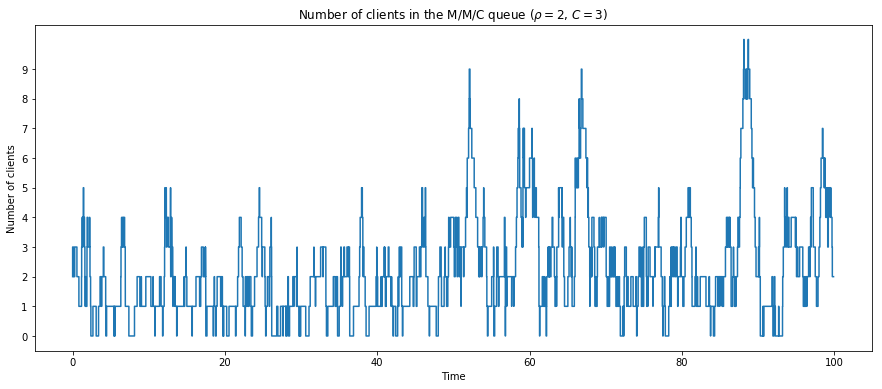

In [5]:
# Plotting the number of clients in the system
T,N,D = MMC()
figure(figsize=(15,6))
step(T,N)
xlabel('Time')
ylabel('Number of clients')
title('Number of clients in the M/M/C queue' 
      +r' ($\rho =%g$, $C=%g$)'%(λ/μ,C))
yticks(range(max(N)), range(max(N)));

### **Answer to question 3**

In [6]:
λ     = 4.
μ     = 3.
ρ     = λ/μ
Cmin  = 2
Cmax  = 6

# Calculation of Erlang C formula
def E_C(ρ=ρ,Cmin=Cmin,Cmax=Cmax):
    v1  = array([ρ/k for k in range(1,Cmax+1)])
    v1  = append([1],v1)
    v1  = cumprod(v1)
    v2  = append([1],arange(1,Cmax+1))
    Num = v1*v2/(v2-ρ)
    Den = cumsum(v1)+v1*ρ/(v2-ρ) 
    ###################
    # Complete the definition of E_C
    E_C = Num / Den
    ###################
    return E_C[Cmin:]

#----
V3 = E_C()[2]

### **Answer to question 4**

In [7]:
###################################################
# Complete the expression of the mean sojourn times
# for C varying from Cmin to Cmax
R  = (E_C() / (μ * (array([k - ρ for k in range(Cmin,Cmax+1)])))) + (1 / μ)
###################################################
# Estimated R
R_est= zeros(Cmax-Cmin+1)
for index,C in enumerate(range(Cmin,Cmax+1)):
    T,N,D = MMC(C=C,λ=λ,μ=μ,N0=2,Tmax=10**3)
    R_est[index] = mean(D)
#-----------------
V4 = norm(R-R_est)/norm(R)

0
1000
0
1000
0
1000
0
1000
0
1000


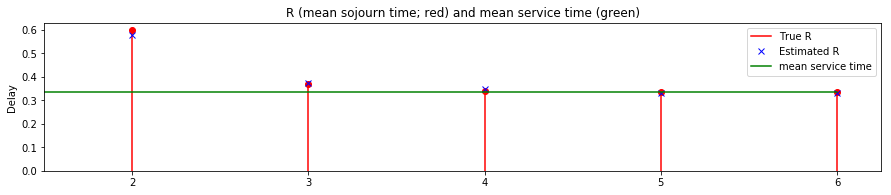

In [8]:
figure(figsize=(15,6))
subplot(211)
k = Cmin
plot([k,k],[0,R[k-Cmin]],'r',label='True R')
plot(k,R[k-Cmin],'or')
plot(k,R_est[k-Cmin],'xb',label='Estimated R')
for k in range(Cmin+1,Cmax+1):
    plot([k,k],[0,R[k-Cmin]],'r')
    plot(k,R[k-Cmin],'or')
    plot(k,R_est[k-Cmin],'xb')
plot([1,Cmax],[1./μ,1./μ],'g',label='mean service time')
axis(xmin=1.5,ymin=0)
title(r'R (mean sojourn time; red) and mean service time (green)')
xticks([c for c in range(Cmin,Cmax+1)],[c for c in range(Cmin,Cmax+1)]);
ylabel(r'Delay')
legend();

The case $C=1$ would correspond to the $M/M/1$ queue. However, here $\lambda>\mu$ and this $M/M/1$ queue would not be stable.

# Your answers for this notebook

In [9]:
print("---------------------------------------------------\n"
      +"VALIDITY OF RESULTS SUPPLIED FOR WEEK V - Part II:\n"
      +"---------------------------------------------------")
results  = dict()
for k in range(1,5):
    results["V"+str(k)] = "NO"
    
try: 
    if abs(V1-4)<.0001:  results["V1"] =  "OK"
except: pass
try: 
    if abs(V2-.7)<.1:  results["V2"] =  "OK"
except: pass
try: 
    if abs(V3-.05)<.01: results["V3"] =  "OK"
except: pass
try: 
    if V4<.1:           results["V4"] =  "OK"
except: pass

for key,val in results.items():
    print(key,': ',val)

---------------------------------------------------
VALIDITY OF RESULTS SUPPLIED FOR WEEK V - Part II:
---------------------------------------------------
V1 :  OK
V2 :  OK
V3 :  OK
V4 :  OK
